# Using yfinance to extract Tesla stock data and 
# Web Scraping to extract Tesla revenue data

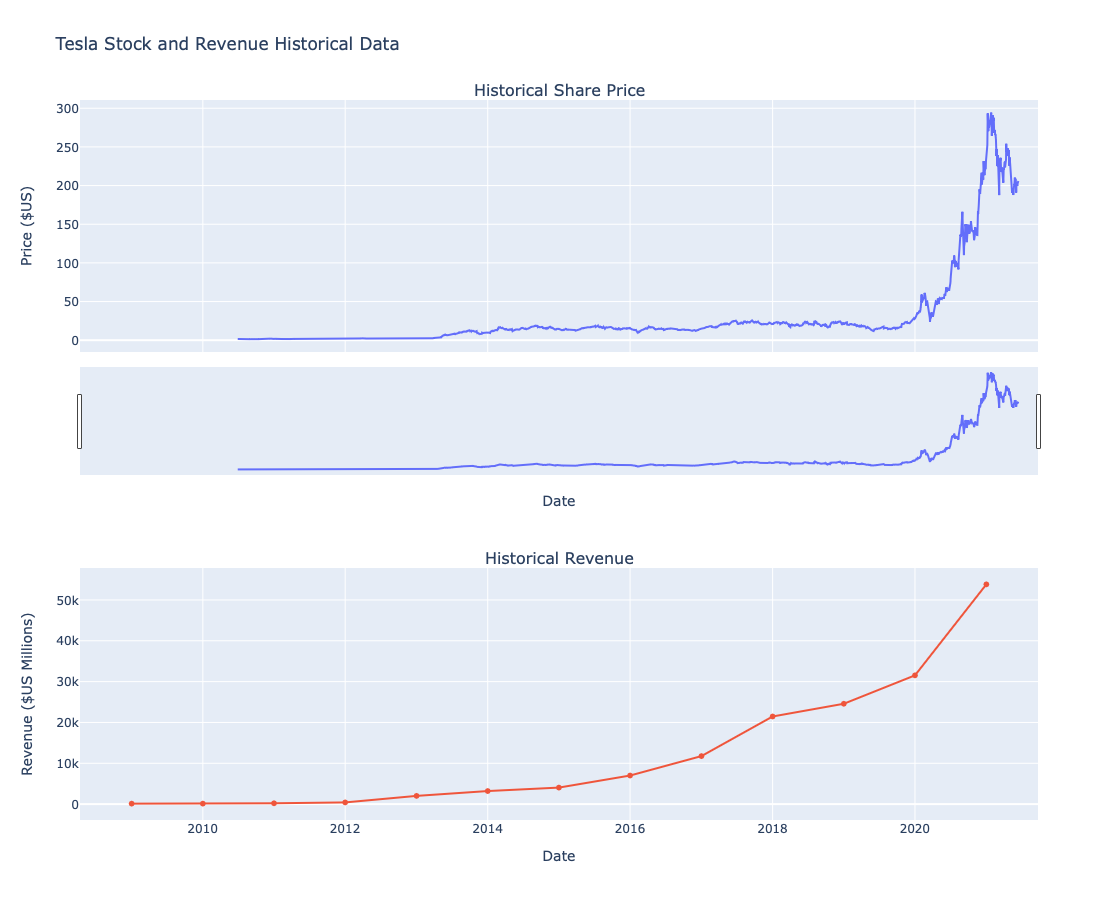

In [180]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

!pip install yfinance
!pip install bs4
!pip install nbformat

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Use yfinance to extract stock data
tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


import requests

url = ' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

html_data = requests.get(url)

soup = BeautifulSoup(html_data.content, 'html5lib')

# Find all tables

tesla_all_tables = soup.find_all('table')
quarterly_revenue = soup.find_all("tbody")[1]
# print(quarterly_revenue)

# Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. 
# The dataframe should have columns Date and Revenue.

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})])
    
# Execute the following line to remove the comma and dollar sign from the Revenue column.
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$',"").str.replace(',', "")

tesla_revenue.tail()

make_graph(tesla_data, tesla_revenue, 'Tesla Stock and Revenue Historical Data')




# Using yfinance to extract GME stock data and 
# Web Scraping to extract GME revenue data


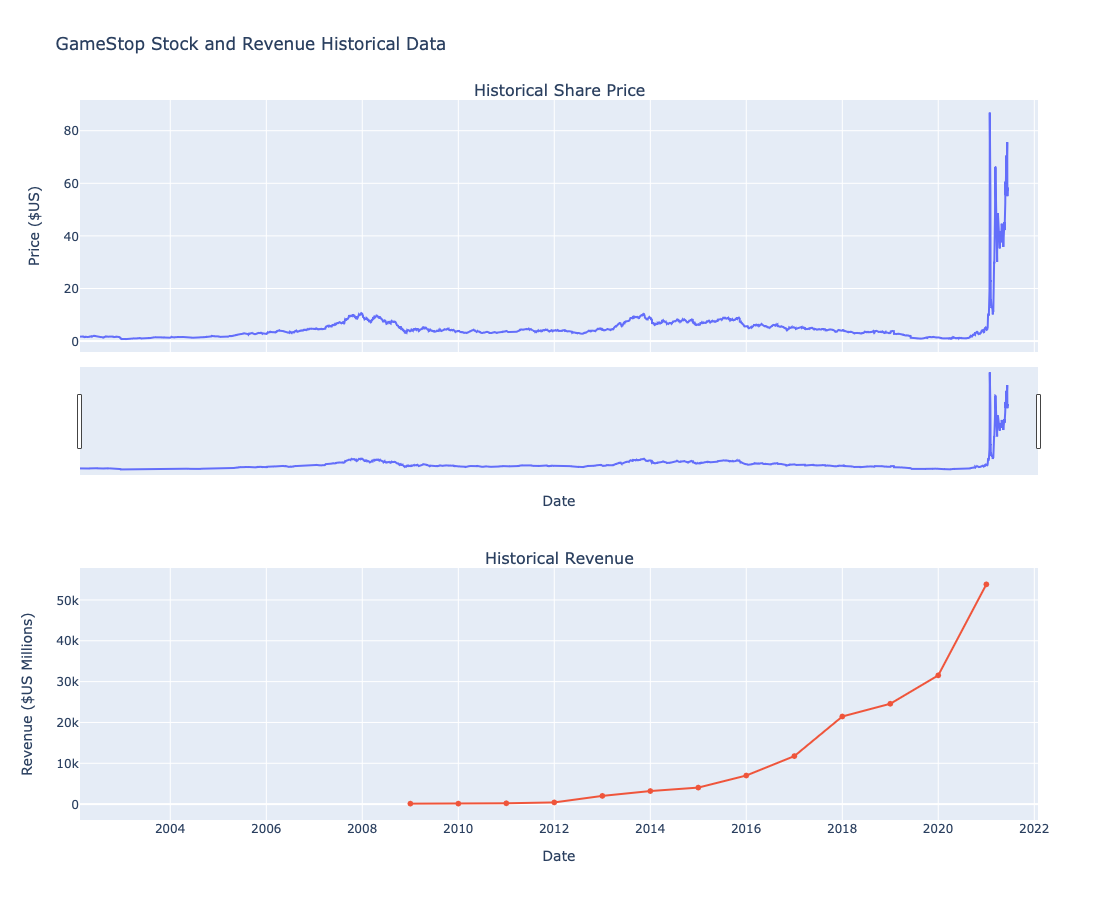

In [182]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

!pip install yfinance
!pip install bs4
!pip install nbformat

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object.

gamestop = yf.Ticker('GME')

# Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. 
# Set the period parameter to "max" so we get information for the maximum amount of time.

gme_data = gamestop.history(period="max")

# Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data dataframe using the head function
gme_data.head()



# Using Web Scraping to extract GME revenue data 

import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

html_data_2 = requests.get(url)

soup = BeautifulSoup(html_data_2.content, 'html5lib')

# Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. 
# The dataframe should have columns Date and Revenue.

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

soup.find_all("tbody"[1])
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})])
    
# Execute the following line to remove the comma and dollar sign from the Revenue column.
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$',"").str.replace(',', "")

gme_revenue.tail()

make_graph(gme_data, gme_revenue, 'GameStop Stock and Revenue Historical Data')

